<a href="https://colab.research.google.com/github/fredydo/Mini-Proyecto2/blob/main/MiniProtecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns
import pandas as pd

db = pickle.load(open("/content/drive/MyDrive/Señales III/Data/data.p", "rb"))

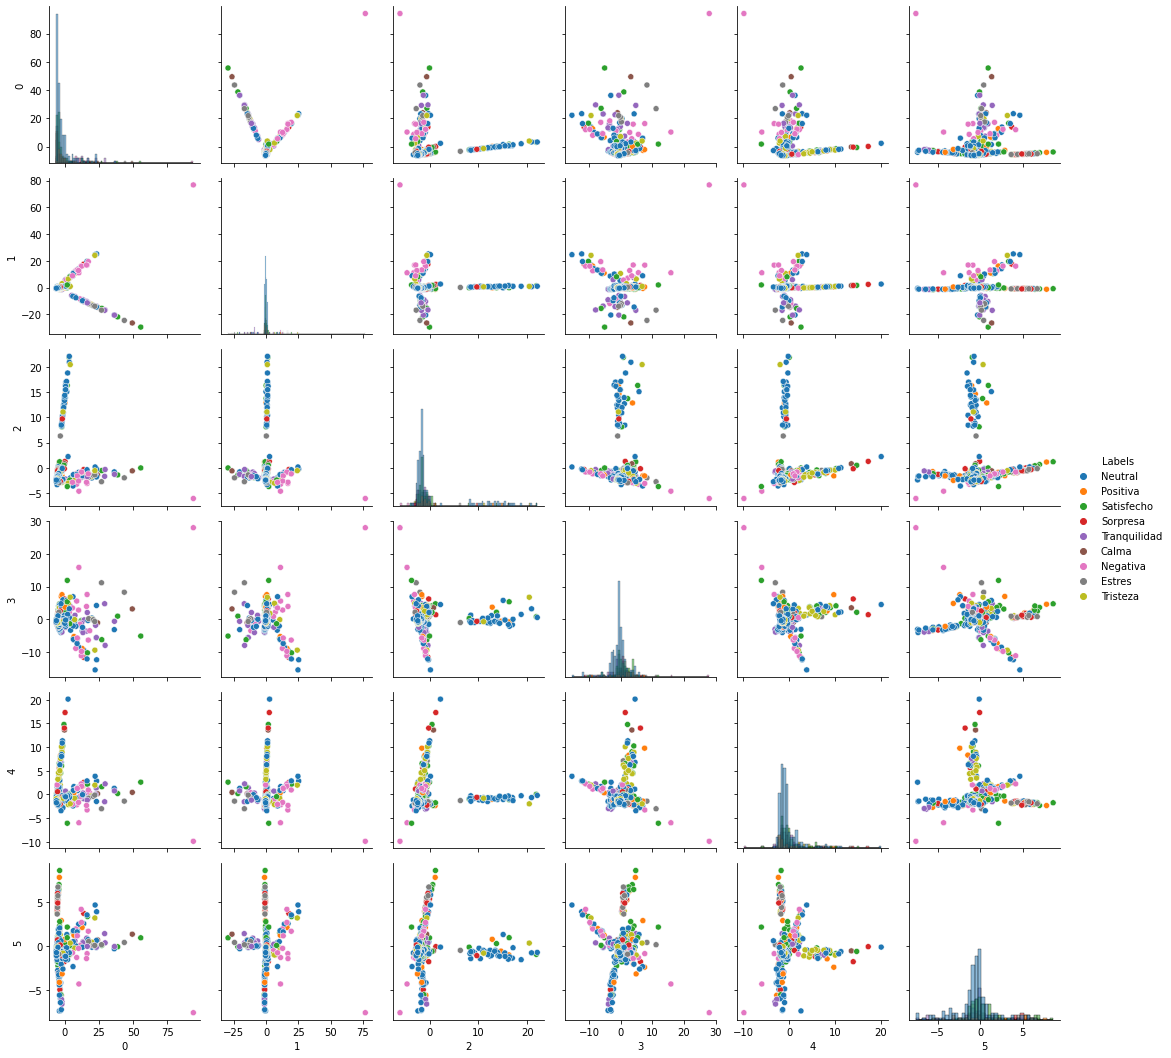

In [35]:
Y =  np.array(db['Labels'].values.tolist())
X =  db.drop(['Labels'],axis=1)
X = X.values
X = scale(X)

# Luego definimos el número de componentes y se crea el modelo PCA
pca = PCA(n_components=6)
pca.fit(X)
# Se transforman los datos al espacio latente
X_pca = pca.transform(X)
# Creamos el dataframe para seaborn
dataXpca = pd.DataFrame(X_pca)
labels  = db["Labels"]
dataXpca['Labels'] = labels.values

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

g = sns.PairGrid(dataXpca, hue="Labels")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Se crea el modelo (ej. clasificador)
model = GaussianNB()
# Se entrena el modelo
model.fit(X,Y)
# Se realiza una predicción
yEst = model.predict(X)

print('Accuracy: ', accuracy_score(Y,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Y,yEst))

model.fit(X_pca,Y)
yEst=model.predict(X_pca)

print('Accuracy: ', accuracy_score(Y,yEst))
print('Confunsion Matrix: \n', confusion_matrix(Y,yEst))

Accuracy:  0.1625
Confunsion Matrix: 
 [[ 3  0  0  0  2  0  6  0  0]
 [ 2  3  0  0  1  0 12  0  0]
 [ 1  0 12  0  0  0  2  1  2]
 [ 5  0  8  4 48  1 99  5  2]
 [ 0  0  2  0 12  0  5  0  0]
 [ 3  0  2  0 16  1 40  3  1]
 [ 0  0  1  0  1  0 20  0  1]
 [ 5  2  1  0  5  0 21  6  0]
 [ 1  0  2  0  2  0 24  0  4]]
Accuracy:  0.335
Confunsion Matrix: 
 [[ 0  0  1  3  0  0  1  6  0]
 [ 0  0  2  4  0  0  9  3  0]
 [ 0  0 11  5  0  0  0  2  0]
 [ 1  1  8 90  0  0 16 56  0]
 [ 0  0  2  8  0  0  8  1  0]
 [ 1  0  3 15  0  0 15 29  3]
 [ 0  0  1  8  0  0 12  2  0]
 [ 1  1  1 16  0  0  4 17  0]
 [ 0  0  1 19  0  0  7  2  4]]
